# Emotion Recognition Model Pipelines

In [1]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    !git clone git@github.com:aaptss/voice_emotion_classification.git
    %cd voice_emotion_classification
    num_workers = 2
else:
    num_workers = 8

## Download data

In [2]:
# %pip install openspeech

from codes import demo_analysis_new
from csgo_tournament_msu_labelled.csgo_tournament_metadata import *
import torch
import numpy as np

C:\Users\arman.pts\AppData\Local\conda\conda\envs\sk_env\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## Prepare data

In [22]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

from data_prehandling.data_prep import get_dataloader, BaseAudioSignalDataset, BaseSpectrogramDataset, prepare_data
from codes.base import *
# from codes.Conformer_Classifier import Conformer_Classifier
from codes.Convent_lstm_model import LSTM_for_baseline, CNN_for_audio

In [23]:
# %reload_ext autoreload
dataset_root = 'csgo_tournament_msu_labelled'
file_path=f'.\\{dataset_root}\\LCB_added'
path_to_audio=f'.\\{dataset_root}\\LCB_data_snd_devided'
path_to_splitted_audio=f'.\\{dataset_root}\\LCB_audio'
path_to_processed_csgo_data=f'.\\{dataset_root}\\demos'

In [40]:
train_list, val_list = prepare_data(file_path=file_path,
                                    path_to_audio=path_to_audio,
                                    path_to_splitted_audio=path_to_splitted_audio,
                                    test_size=0.2)

.\csgo_tournament_msu_labelled\LCB_audio exists; skip splitting


In [41]:
# train_dataloader,val_dataloader = get_dataloader(file_path=file_path,
#                                                  path_to_audio=path_to_audio,
#                                                  path_to_splitted_audio=path_to_splitted_audio,
#                                                  path_to_processed_csgo_data=path_to_processed_csgo_data,
#                                                  test_size=0.2,
#                                                  use_game_context=True,
#                                                  num_workers=num_workers,
#                                                  batch_size=128,
#                                                  DatasetClass=BaseAudioSignalDataset)

In [42]:
spec_train_dataloader, spec_val_dataloader = get_dataloader(file_path=file_path,
                                                 path_to_audio=path_to_audio,
                                                 path_to_splitted_audio=path_to_splitted_audio,
                                                 path_to_processed_csgo_data=path_to_processed_csgo_data,
                                                 test_size=0.2,
                                                 use_game_context=True,
                                                 num_workers=num_workers,
                                                 batch_size=128,
                                                 DatasetClass=BaseSpectrogramDataset)

.\csgo_tournament_msu_labelled\LCB_audio exists; skip splitting

Prepare train dataset
Preparing game context vectors


  0%|          | 0/8148 [00:00<?, ?it/s]

Finished in 0.00 minutes
Prepare val dataset
Preparing game context vectors


  0%|          | 0/2037 [00:00<?, ?it/s]

Finished in 0.00 minutes


In [48]:
spec_val_dataloader.dataset.__getitem__(1)[0][0]

tensor([[ 31.,  79.,  84.,  ...,  79., 103.,  70.],
        [ 73.,  84.,  93.,  ..., 120., 126., 116.],
        [ 86.,  92.,  78.,  ..., 149., 153., 128.],
        ...,
        [ 28.,  58.,  48.,  ...,  66.,  79.,  53.],
        [ 55.,  37.,  45.,  ...,  52.,  64.,  66.],
        [ 68.,   0.,  56.,  ...,  61.,  45.,  46.]])

tensor([[255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        ...,
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.]])

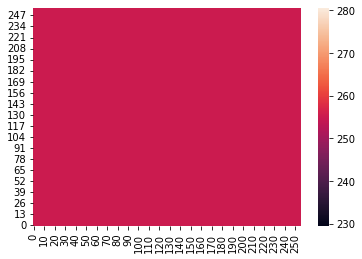

In [67]:
spc_norm = spec_val_dataloader.dataset.__getitem__(1)[0][0]
# dl_out[1][0]
spec_val_dataloader.dataset.__visualize__(dl_out[0][0][-1])
dl_out[0][0][-1]

-36.83646543377309

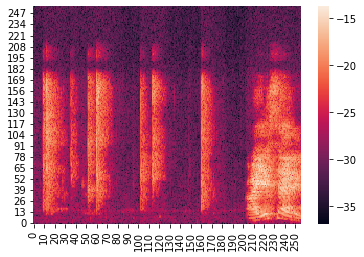

In [57]:
aud = spec_val_dataloader.dataset.load_wav(spec_val_dataloader.dataset.data_list[1][0])
spc = spec_val_dataloader.dataset.calculate_all_windows(aud)
# spc = 255*(spc - np.min(spc))/np.max(spc - np.min(spc))

spec_val_dataloader.dataset.__visualize__(spc)
np.min(spc)